In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,plot_confusion_matrix,f1_score
from imblearn.over_sampling import SMOTE,ADASYN,RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss,RandomUnderSampler

In [2]:
df = pd.read_csv('')

df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'All_data.csv'

In [3]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000,508146.000000
mean,254073.500000,38.808413,0.997936,26.406572,0.458667,30554.453041,111.975838,154.340123,0.091922
std,146689.259281,15.500179,0.045388,13.224921,0.498289,17146.574625,54.246027,83.668793,0.288917
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,127037.250000,25.000000,1.000000,15.000000,0.000000,24381.000000,26.000000,82.000000,0.000000
50%,254073.500000,36.000000,1.000000,28.000000,0.000000,31661.000000,133.000000,154.000000,0.000000
75%,381109.750000,49.000000,1.000000,35.000000,1.000000,39403.750000,152.000000,227.000000,0.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              508146 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 46.5+ MB


In [5]:
df = df.drop('id', axis =1)

In [6]:
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [7]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [8]:
df.replace({"Male":0, 'Female':1}, inplace= True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [9]:
df['Vehicle_Age'].unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [10]:
df.replace({'> 2 Years':3, '1-2 Year':2, '< 1 Year':1},inplace=True)
df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,3,Yes,40454.0,26.0,217,1
1,0,76,1,3.0,0,2,No,33536.0,26.0,183,0
2,0,47,1,28.0,0,3,Yes,38294.0,26.0,27,1
3,0,21,1,11.0,1,1,No,28619.0,152.0,203,0
4,1,29,1,41.0,1,1,No,27496.0,152.0,39,0


In [11]:
df['Vehicle_Damage'].unique()

array(['Yes', 'No'], dtype=object)

In [12]:
df.replace({'Yes':1, 'No':0},inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                508146 non-null  int64  
 1   Age                   508146 non-null  int64  
 2   Driving_License       508146 non-null  int64  
 3   Region_Code           508146 non-null  float64
 4   Previously_Insured    508146 non-null  int64  
 5   Vehicle_Age           508146 non-null  int64  
 6   Vehicle_Damage        508146 non-null  int64  
 7   Annual_Premium        508146 non-null  float64
 8   Policy_Sales_Channel  508146 non-null  float64
 9   Vintage               508146 non-null  int64  
 10  Response              508146 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 42.6 MB


## Checking for outliers

<AxesSubplot:xlabel='Annual_Premium'>

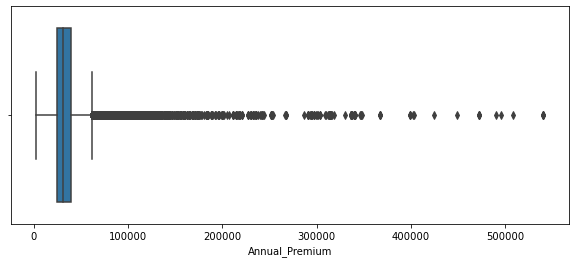

In [14]:
plt.figure(figsize=(10,4))
sns.boxplot(df['Annual_Premium'])

### We shall handel outliers by Interquartile range (IQR Method)

In [15]:
q1 = df['Annual_Premium'].quantile(0.25)
q3 = df['Annual_Premium'].quantile(0.75)
iqr = q3 - q1
upper_limit = q3 + 1.5*iqr
print(upper_limit)

61937.875


In [16]:
df['Annual_Premium'] = np.where(df['Annual_Premium']>upper_limit, upper_limit,df['Annual_Premium'])

In [17]:
df.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [18]:
df  = df.drop_duplicates()

In [19]:
df = df.reset_index(drop = True)

In [20]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,0,44,1,28.0,0,3,1,40454.000,26.0,217,1
1,0,76,1,3.0,0,2,0,33536.000,26.0,183,0
2,0,47,1,28.0,0,3,1,38294.000,26.0,27,1
3,0,21,1,11.0,1,1,0,28619.000,152.0,203,0
4,1,29,1,41.0,1,1,0,27496.000,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
507378,1,26,1,37.0,1,1,0,30867.000,152.0,56,0
507379,1,38,1,28.0,0,2,1,28700.000,122.0,165,0
507380,0,21,1,46.0,1,1,0,29802.000,152.0,74,0
507381,0,71,1,28.0,1,2,0,61937.875,26.0,265,0


In [21]:
df['Response'].value_counts(normalize=True)

0    0.908004
1    0.091996
Name: Response, dtype: float64

### Here due imbalance data (90%-10%) we shall get good accuracy but very poor values of precision, recall and f1 score

### so balancing is preffered

### Over Sampling

### Model Building

In [22]:
x = df.drop(columns='Response')
y = df['Response']


In [23]:
x_train,x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=18,stratify=y)

In [24]:
smt = SMOTE(0.8)
x_trainsmt,y_trainsmt = smt.fit_resample(x_train,y_train)

In [25]:
lr_clf = LogisticRegression()
lr_clf

LogisticRegression()

In [26]:
lr_clf.fit(x_trainsmt,y_trainsmt)

LogisticRegression()

In [27]:
# Testing Data Evaluation
y_pred = lr_clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)

cnf_matrix =confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix: \n',cnf_matrix)

clf_rep = classification_report(y_test,y_pred)
print('\nClassification Report: \n',clf_rep)

Accuracy:  0.6879194300186249

Confusion Matrix: 
 [[63403 28739]
 [ 2930  6405]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.69      0.80     92142
           1       0.18      0.69      0.29      9335

    accuracy                           0.69    101477
   macro avg       0.57      0.69      0.54    101477
weighted avg       0.88      0.69      0.75    101477



In [28]:
# training Data Evaluation
y_pred_train = lr_clf.predict(x_trainsmt)

accuracy = accuracy_score(y_trainsmt,y_pred_train)
print('Accuracy: ',accuracy)

cnf_matrix =confusion_matrix(y_trainsmt,y_pred_train)
print('\nConfusion Matrix: \n',cnf_matrix)

clf_rep = classification_report(y_trainsmt,y_pred_train)
print('\nClassification Report: \n',clf_rep)

Accuracy:  0.7013980690819472

Confusion Matrix: 
 [[252872 115692]
 [ 82405 212446]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72    368564
           1       0.65      0.72      0.68    294851

    accuracy                           0.70    663415
   macro avg       0.70      0.70      0.70    663415
weighted avg       0.71      0.70      0.70    663415



In [29]:
for i in range(20,80,5):
    sm = SMOTE(i/100,random_state= 18)
    x_train_smt,y_train_smt = sm.fit_resample(x_train,y_train)
    lr_clf = LogisticRegression()
    lr_clf.fit(x_train_smt,y_train_smt)
    # Testing Data Evaluation
    y_pred = lr_clf.predict(x_test)
    f1_model =f1_score(y_test,y_pred)
    print(f"F1_Score for {i} is {f1_model}")

F1_Score for 20 is 0.0
F1_Score for 25 is 0.21222256004864698
F1_Score for 30 is 0.25305770060914196
F1_Score for 35 is 0.0060460752632127595
F1_Score for 40 is 0.20530739446595522
F1_Score for 45 is 0.2964188630185557
F1_Score for 50 is 0.30095875645316844
F1_Score for 55 is 0.30176348267574066
F1_Score for 60 is 0.3046412842363119
F1_Score for 65 is 0.3072473972740532
F1_Score for 70 is 0.309236145781328
F1_Score for 75 is 0.31087323117530613


In [30]:
for i in range(80,105,5):
    sm = SMOTE(i/100,random_state= 18)
    x_train_smt,y_train_smt = sm.fit_resample(x_train,y_train)
    lr_clf = LogisticRegression()
    lr_clf.fit(x_train_smt,y_train_smt)
    # Testing Data Evaluation
    y_pred = lr_clf.predict(x_test)
    f1_model =f1_score(y_test,y_pred)
    print(f"F1_Score for {i} is {f1_model}")

F1_Score for 80 is 0.31451784826017953
F1_Score for 85 is 0.31610741422436167
F1_Score for 90 is 0.3174690635259545
F1_Score for 95 is 0.3168645474275501
F1_Score for 100 is 0.20767649074708708


In [31]:
for i in range(20,80,5):
    sm = SMOTE(i/100,random_state= 21)
    x_train_sm,y_train_sm = sm.fit_resample(x_train,y_train)
    lr_clf = LogisticRegression()
    lr_clf.fit(x_train_sm,y_train_sm)
    # Testing Data Evaluation
    y_pred = lr_clf.predict(x_test)

    accuracy = accuracy_score(y_test,y_pred)
    print(f'\nAccuracy for {i}: ',accuracy)
    cnf_matrix =confusion_matrix(y_test,y_pred)
    print('\nConfusion Matrix: \n',cnf_matrix)
    clf_rep = classification_report(y_test,y_pred)
    print('\nClassification Report: \n',clf_rep)
    print('**'*50)


Accuracy for 20:  0.9080087113336027

Confusion Matrix: 
 [[92142     0]
 [ 9335     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     92142
           1       0.00      0.00      0.00      9335

    accuracy                           0.91    101477
   macro avg       0.45      0.50      0.48    101477
weighted avg       0.82      0.91      0.86    101477

****************************************************************************************************

Accuracy for 25:  0.9080087113336027

Confusion Matrix: 
 [[92142     0]
 [ 9335     0]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     92142
           1       0.00      0.00      0.00      9335

    accuracy                           0.91    101477
   macro avg       0.45      0.50      0.48    101477
weighted avg       0.82      0.91      0.86    101477

*************

In [32]:
smt = SMOTE(0.9)
x_trainsmt,y_trainsmt = smt.fit_resample(x_train,y_train)

In [33]:
rf_clf = RandomForestClassifier(random_state=12)
rf_clf.fit(x_trainsmt,y_trainsmt)

RandomForestClassifier(random_state=12)

In [34]:
# Testing Data Evaluation
y_pred = rf_clf.predict(x_test)

accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ',accuracy)

cnf_matrix =confusion_matrix(y_test,y_pred)
print('\nConfusion Matrix: \n',cnf_matrix)

clf_rep = classification_report(y_test,y_pred)
print('\nClassification Report: \n',clf_rep)

Accuracy:  0.8450979039585325

Confusion Matrix: 
 [[82907  9235]
 [ 6484  2851]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.90      0.91     92142
           1       0.24      0.31      0.27      9335

    accuracy                           0.85    101477
   macro avg       0.58      0.60      0.59    101477
weighted avg       0.86      0.85      0.85    101477



In [35]:
# training Data Evaluation
y_pred_train = rf_clf.predict(x_trainsmt)

accuracy = accuracy_score(y_trainsmt,y_pred_train)
print('Accuracy: ',accuracy)

cnf_matrix =confusion_matrix(y_trainsmt,y_pred_train)
print('\nConfusion Matrix: \n',cnf_matrix)

clf_rep = classification_report(y_trainsmt,y_pred_train)
print('\nClassification Report: \n',clf_rep)

Accuracy:  0.9995216137752384

Confusion Matrix: 
 [[368293    271]
 [    64 331643]]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368564
           1       1.00      1.00      1.00    331707

    accuracy                           1.00    700271
   macro avg       1.00      1.00      1.00    700271
weighted avg       1.00      1.00      1.00    700271



## hyperparameters tuning for random forest

In [ ]:
rf_model = RandomForestClassifier(random_state=10)

hyp = {
    'n_estimators': np.arange(10,150),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(5,15),
    'min_samples_split':np.arange(5,20) ,
    'min_samples_leaf': np.arange(4,15) ,
    'max_features':['auto','log2','sqrt'],    
    'random_state' : np.arange(1,14)
}

rscv_rf_clf = RandomizedSearchCV(rf_model, hyp, cv=5)
rscv_rf_clf.fit(x_trainsmt, y_trainsmt)
rscv_rf_clf.best_params_